<a href="https://colab.research.google.com/github/profliuhao/CSIT598/blob/main/CSIT598_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Training the SVM model
# Using a linear kernel (can be changed to 'rbf' or other kernels)
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluating the model on the training set
y_train_pred = svm_clf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report - Training Set:\n", classification_report(y_train, y_train_pred))

# Evaluating the model on the test set
y_test_pred = svm_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report - Test Set:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.9833333333333333

Classification Report - Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Test Accuracy: 0.9666666666666667

Classification Report - Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



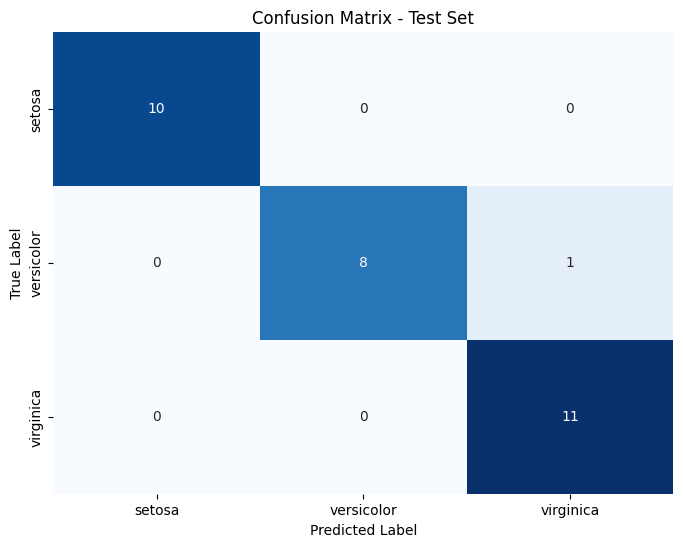

In [4]:
# Plotting a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
